# Question 1 - CloverLeaf bridge

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from typing import Tuple, Dict
import seaborn as sns
import os
import time
import math

In [2]:
# function to read the image
def load_cloverleaf_image(file_path: str):
    img = cv2.imread(file_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if img is None:
        raise FileNotFoundError(f"Image file not found!!!")
    return img

# function to display the image
def display_image(img: np.ndarray, title: str):
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [3]:
# function to display the image details
def display_metadata(filepath: str):
    # define struct for metadata
    meta = {
        'image': {},
        'file':{},
        'color':{},
        'pixel_stats':{}
    }

    img = Image.open(filepath)

    # basic image details
    meta['image'] = {
        'format': img.format,
        'mode': img.mode,
        'size': img.size,
        'dimensions': f"{img.width} x {img.height}",
        'aspect_ratio': round(img.width/img.height,2),
    }

    # file details
    file_stats = os.stat(filepath)
    meta['file'] = {
        'file_size': f"{round(file_stats.st_size / (1024 * 1024), 2)} MB",
        'created': file_stats.st_ctime,
    }

    # color details
    colors = img.getcolors()
    meta['color'] = {
        'num_colors': len(colors),
        'colors': colors,
        'bands': img.getbands(),
        'bits_per_pixel': len(img.getbands()) * 8,
    }

    # Get pixel data statistics
    img_array = np.array(img)
    meta['pixel_stats'] = {
        'min': int(img_array.min()),
        'max': int(img_array.max()),
        'mean': round(float(img_array.mean()), 2),
        'std': round(float(img_array.std()), 2)
    }

    sections = ['image', 'file', 'color', 'pixel_stats']
    for section in sections:
        print(f"\n{'-'*20} {section.upper()} {'-'*20}")
        for key, value in meta[section].items():
            print(f"{key}: {value}")




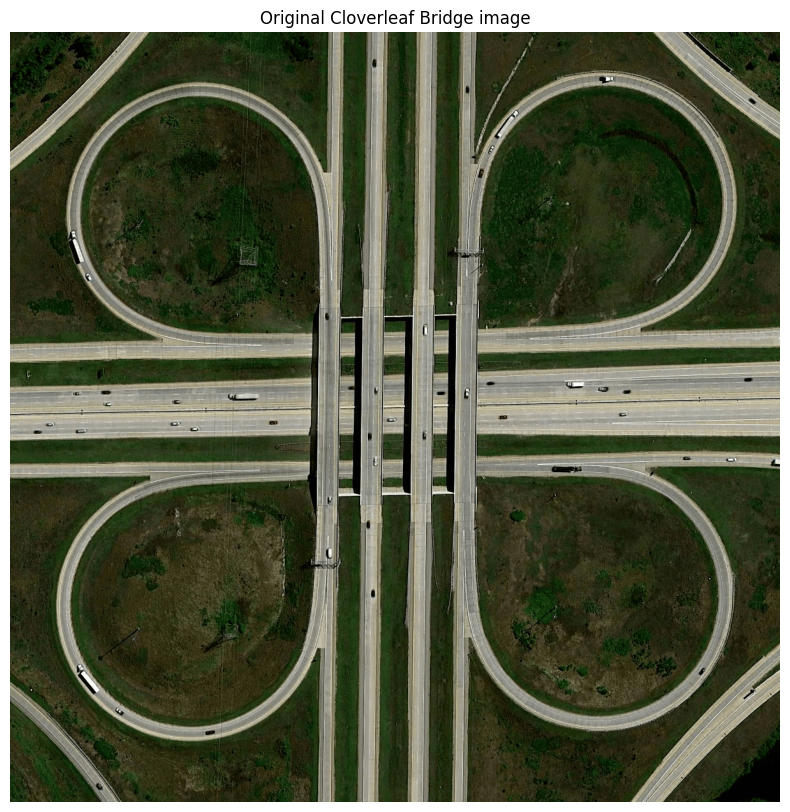


-------------------- IMAGE --------------------
format: PNG
mode: P
size: (1207, 1207)
dimensions: 1207 x 1207
aspect_ratio: 1.0

-------------------- FILE --------------------
file_size: 1.18 MB
created: 1737367641.081515

-------------------- COLOR --------------------
num_colors: 256
colors: [(14860, 0), (12932, 1), (10558, 2), (7956, 3), (10859, 4), (10929, 5), (12372, 6), (10928, 7), (11104, 8), (13237, 9), (10623, 10), (9433, 11), (9229, 12), (7759, 13), (10130, 14), (10481, 15), (8965, 16), (10049, 17), (8198, 18), (9052, 19), (11462, 20), (9020, 21), (9575, 22), (11820, 23), (9140, 24), (10390, 25), (8666, 26), (9449, 27), (9131, 28), (8748, 29), (8931, 30), (8456, 31), (12668, 32), (10449, 33), (8677, 34), (7106, 35), (9692, 36), (8524, 37), (11457, 38), (7440, 39), (8650, 40), (7398, 41), (9623, 42), (9031, 43), (9463, 44), (7121, 45), (7324, 46), (7356, 47), (8376, 48), (8194, 49), (6876, 50), (10087, 51), (6832, 52), (9116, 53), (8348, 54), (8449, 55), (6583, 56), (6731, 5

In [4]:
display_image(load_cloverleaf_image('cloverleaf_interchange.png'), 'Original Cloverleaf Bridge image')
display_metadata('cloverleaf_interchange.png')

In [5]:
# function to plot the color histogram without cv2
def manual_hist(image: np.ndarray, bins = 256, pixel_range = (0, 256)):
    histograms = []
    print(image.shape)
    for channel_index in range(3):
        channel = image[:, :, channel_index]
        buckets = np.linspace(0,0,bins)
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                buckets[channel[i][j]] += 1
        histograms.append(buckets)
    return histograms

# function to plot the color histogram using cv2
def cv2_hist(image: np.ndarray):
    histograms = []
    for channel in range(3):
        hist = cv2.calcHist([image], [channel], None, [256], [0, 256])
        histograms.append(hist.ravel())
    return histograms

# compare histograms
def compare_hist(image_path):
    img = load_cloverleaf_image(image_path)
    start = time.time()
    manual_histogram = manual_hist(img)
    end = time.time()
    manual_time = end - start

    start = time.time()
    cv2_histogram = cv2_hist(img)
    end = time.time()
    cv2_time = end - start

    print(f"Manual Histogram Time: {manual_time} seconds")
    print(f"OpenCV Histogram Time: {cv2_time} seconds")
    
    # plot both histograms
    plt.figure(figsize=(20, 5))
    plt.title("Manual Histogram")

    plt.subplot(1, 3, 1)
    plt.xlabel("Intensity")
    plt.ylabel("Frequency")
    plt.plot(manual_histogram[0], color='red', label='Red', alpha=0.75)
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.xlabel("Intensity")
    plt.ylabel("Frequency")
    plt.plot(manual_histogram[1], color='green', label='Green', alpha=0.75)
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.xlabel("Intensity")
    plt.ylabel("Frequency")
    plt.plot(manual_histogram[2], color='blue', label='Blue', alpha=0.75)
    plt.legend()
    plt.show()

    plt.figure(figsize=(20, 5))
    plt.title("OpenCV Histogram")

    plt.subplot(1, 3, 1)
    plt.xlabel("Intensity")
    plt.ylabel("Frequency")
    plt.plot(cv2_histogram[0], color='red', label='Red', alpha=0.75)
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.xlabel("Intensity")
    plt.ylabel("Frequency")
    plt.plot(cv2_histogram[1], color='green', label='Green', alpha=0.75)
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.xlabel("Intensity")
    plt.ylabel("Frequency")
    plt.plot(cv2_histogram[2], color='blue', label='Blue', alpha=0.75)
    plt.legend()
    plt.show()

(1207, 1207, 3)
Manual Histogram Time: 1.0618836879730225 seconds
OpenCV Histogram Time: 0.00159454345703125 seconds


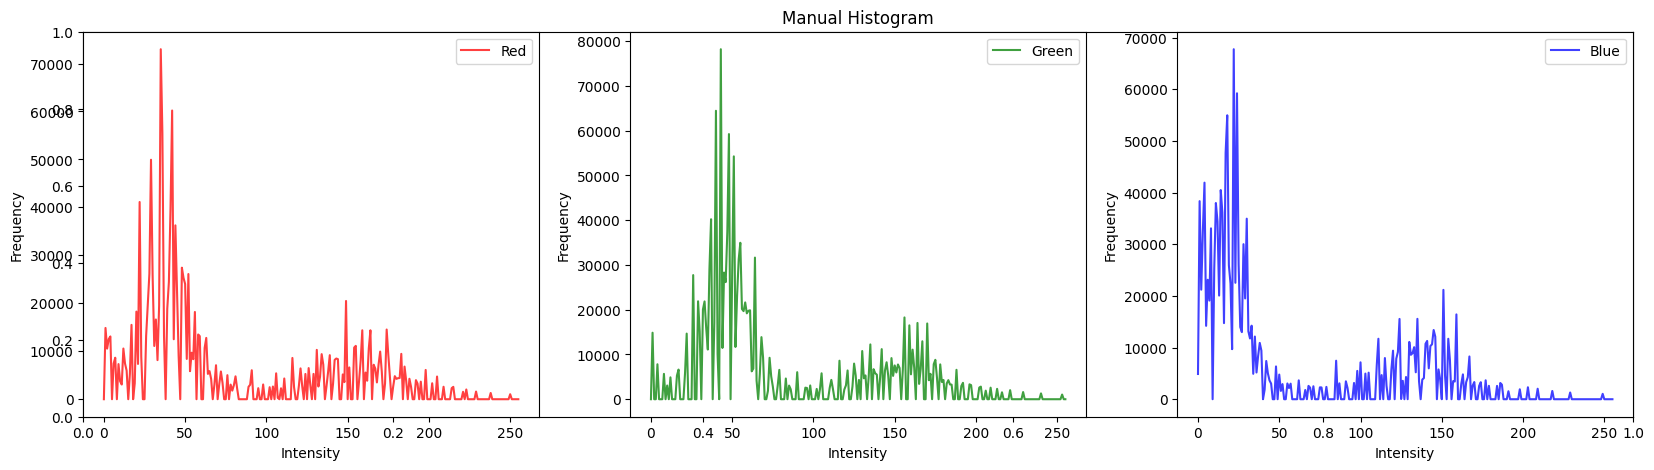

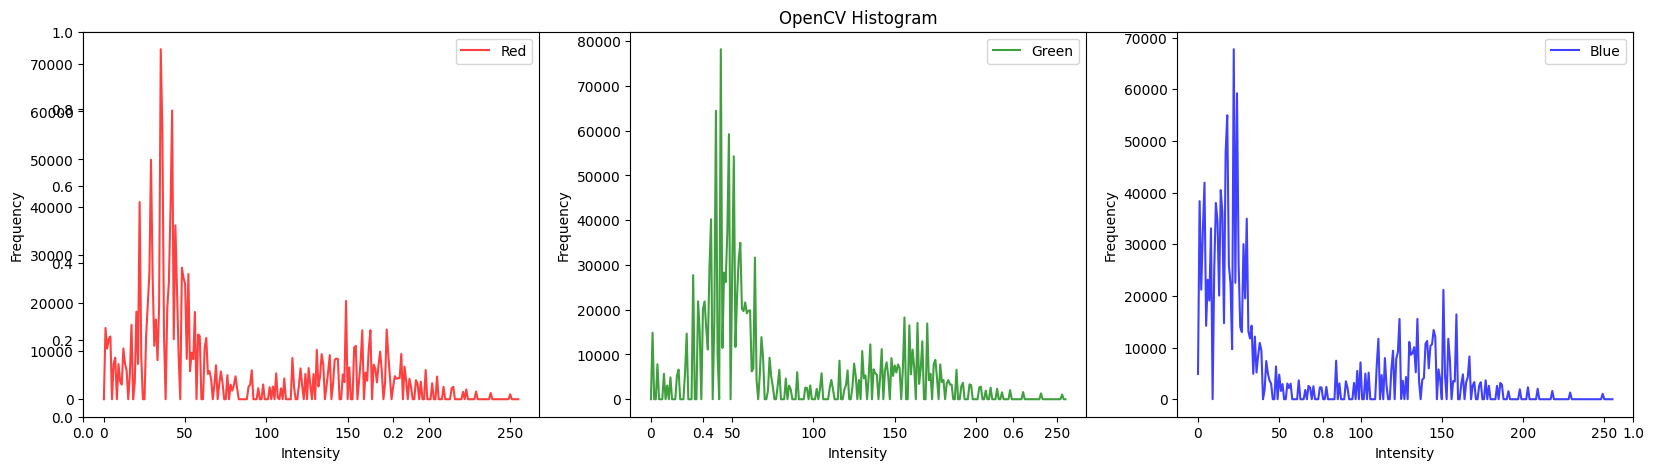

In [6]:
compare_hist('cloverleaf_interchange.png')


#### Comparison for my manual and openCV implementation

OpenCV's speed advantage stems from its optimized algorithms, low-level optimizations like SIMD instructions, and potential hardware acceleration through GPUs. Extensive testing and refinement over time contribute to its robust and efficient implementation.

However the final histogram for both implementations is identical.

In [7]:
def preprocess_img(img: np.ndarray):
    steps = {}
    
    # original image
    steps['original'] = img
    
    # convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    steps['1. Convert to grayscale'] = gray
    
    # apply bilateral filter (edge-preserving blurring)
    blurred = cv2.bilateralFilter(gray, 9, 75, 75)
    steps['2. Bilateral Filter'] = blurred
    
    # Threshold the image
    _, thresholded = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    steps['3. Thresholding'] = thresholded
    
    # Morphological operations to clean up the image
    kernel_close = np.ones((9,9), np.uint8)
    morphed = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel_close)
    morphed = cv2.morphologyEx(morphed, cv2.MORPH_OPEN, kernel_close)
    steps['4. Morphological Operations'] = morphed
    
    # Edge detection
    edges = cv2.Canny(morphed, 100, 150)
    steps['5. Edge Detection'] = edges
    
    plt.figure(figsize=(20, 20))
    for i, title in enumerate(steps.keys()):
        plt.subplot(3, 3, i + 1)
        plt.imshow(steps[title], cmap='gray')
        plt.title(title)
        plt.axis('off')
    
    plt.show()
    
    return blurred, edges


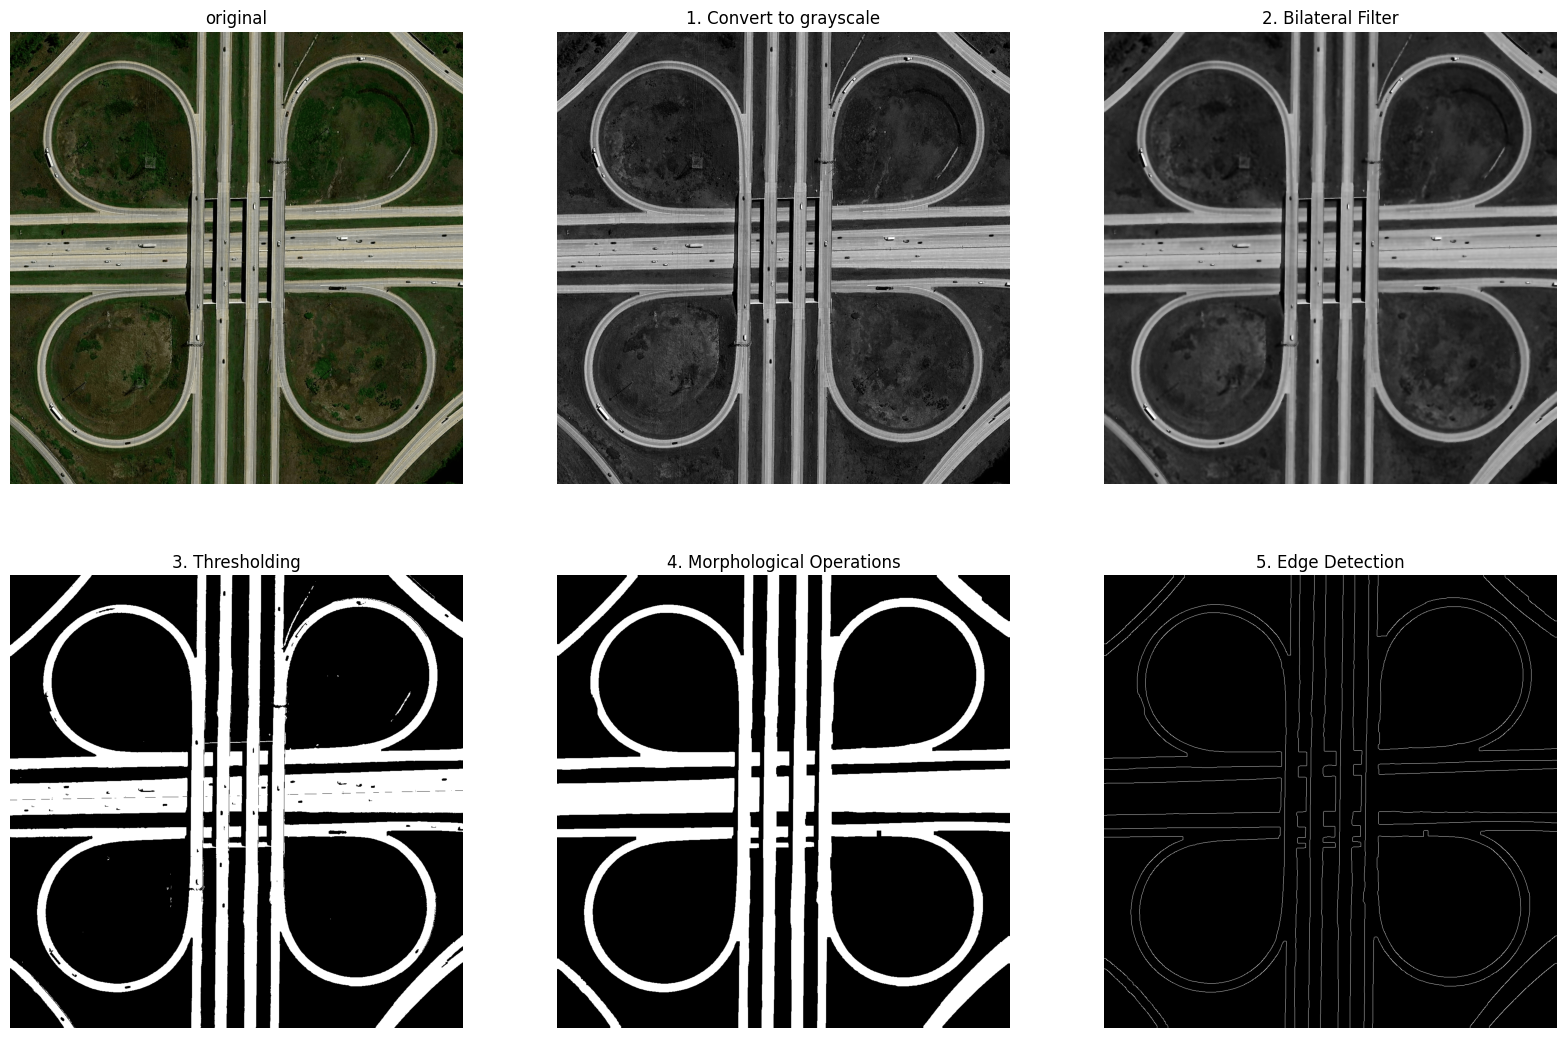

In [8]:
blurred_img, preprocessed_img = preprocess_img(load_cloverleaf_image('cloverleaf_interchange.png'))

##### Justifications for the pre-processing choices made:

1. **Convert to grayscale**: Reduces dimensionality, hence simplifies computation. Since edge information is only necessary, irrelevant color information is discarded.

2. **Bilateral Filter**: Preserves edges while smoothing noise. This is crucial for maintaining the sharp definition of the cloverleaf structures while reducing spurious edge detection. (To avoid losing crucial edge information) 9x9 kernel size balances smoothing and edge preservation; 75 for both sigma values provides appropriate smoothing.

3. **Thresholding**: Creates a binary image, separating foreground (bridge structure) from background. This simplifies subsequent shape analysis and edge detection. (Binarizes the image hence helping the computer differentiate the roads better)

4. **Morphological Operations**: Removes small artifacts and fills gaps in the bridge structure. MORPH_CLOSE connects broken parts, while MORPH_OPEN removes small noise clusters. (9x9 kernel size is suitable for removing small noise and closing gaps in the bridge structure.)

5. **Edge Detection**: Identifies the boundaries of the cloverleaf structures. Canny edge detection provides a strong, clean edge map for further processing.

In [21]:
def detect_cloverleaves(blurred: np.ndarray, edges: np.ndarray):    
    height, width = edges.shape
    min_radius = min(height, width) // 8
    max_radius = min(height, width) // 4
    
    # Create a mask for the circles
    circle_mask = np.zeros_like(edges)
    road_mask = np.ones_like(edges)

    # thinner road widths help differentiate cloverleaf circles better
    road_width = width // 13
    center_x = width // 2
    center_y = height // 2
    
    # Mask out central roads
    road_mask[:, center_x - road_width:center_x + road_width] = 0
    road_mask[center_y - road_width:center_y + road_width, :] = 0
    
    # HoughCircles for circle detection (cloverleaf is basically 3/4th circle)
    circles = cv2.HoughCircles(
        blurred,
        cv2.HOUGH_GRADIENT,
        dp=1,
        minDist=max_radius,
        param1=50,
        param2=20, 
        minRadius=min_radius,
        maxRadius=max_radius
    )
    
    if circles is not None:
        circles = np.uint16(np.around(circles))
        # one cloverleaf in each quadrant -> split into quadrants
        quadrants = [
            {"x": width//4, "y": height//4},     
            {"x": 3*width//4, "y": height//4},   
            {"x": width//4, "y": 3*height//4},   
            {"x": 3*width//4, "y": 3*height//4}  
        ]
        
        # Find closest circle to each quadrant
        for quadrant in quadrants:
            min_dist = float('inf')
            best_circle = None
            
            for circle in circles[0, :]:
                dist = np.sqrt((circle[0] - quadrant["x"])**2 + 
                             (circle[1] - quadrant["y"])**2)
                if dist < min_dist:
                    min_dist = dist
                    best_circle = circle
            
            if best_circle is not None:
                padded_radius = int(best_circle[2] * 1.2)  
                cv2.circle(circle_mask, 
                          (best_circle[0], best_circle[1]), 
                          padded_radius, 255, -1)
    
    border_mask = np.ones_like(edges)
    
    final_result = cv2.bitwise_and(edges, circle_mask)
    final_result = cv2.bitwise_and(final_result, border_mask)
    final_result = cv2.bitwise_and(final_result, road_mask)
    
    kernel_close = np.ones((5,5), np.uint8)
    final_result = cv2.morphologyEx(final_result, cv2.MORPH_CLOSE, kernel_close)
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(131)
    plt.imshow(load_cloverleaf_image('cloverleaf_interchange.png'))
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(132)
    plt.imshow(edges, cmap='gray')
    plt.title('Preprocessed Image')
    plt.axis('off')
    
    plt.subplot(133)
    plt.imshow(final_result, cmap='gray')
    plt.title('Detected Cloverleaves')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

    return final_result

/tmp/ipykernel_461607/3474742713.py:47: RuntimeWarning: overflow encountered in scalar subtract
  dist = np.sqrt((circle[0] - quadrant["x"])**2 +
/tmp/ipykernel_461607/3474742713.py:48: RuntimeWarning: overflow encountered in scalar subtract
  (circle[1] - quadrant["y"])**2)
/tmp/ipykernel_461607/3474742713.py:47: RuntimeWarning: overflow encountered in scalar add
  dist = np.sqrt((circle[0] - quadrant["x"])**2 +


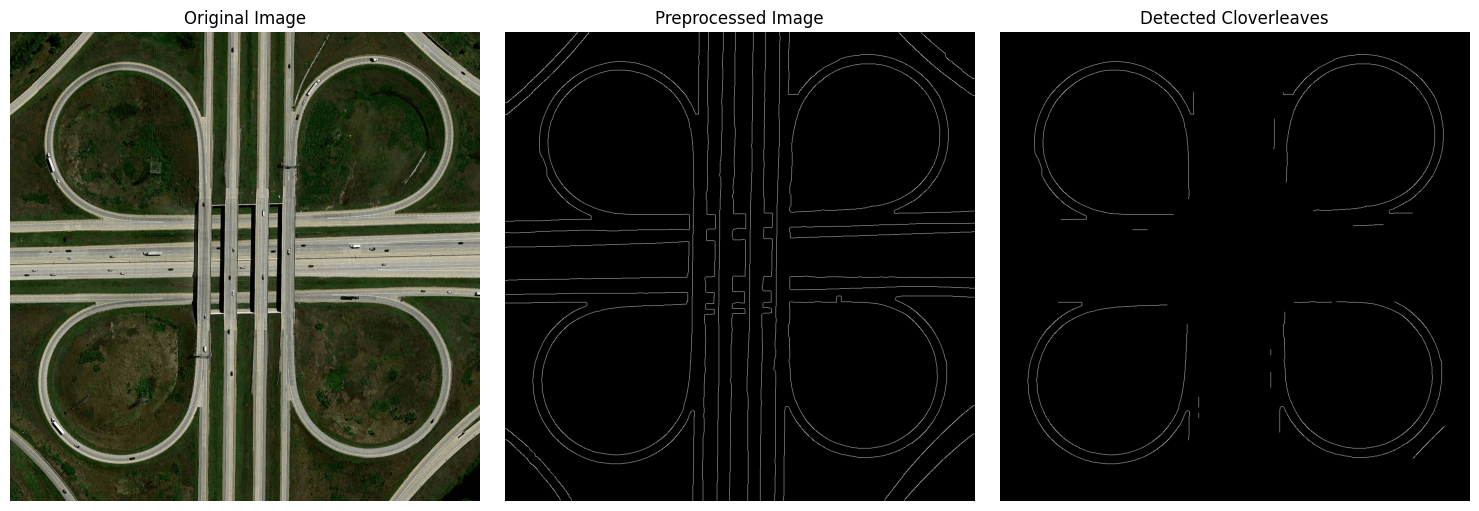

In [22]:
cloverleaf = detect_cloverleaves(blurred_img,preprocessed_img)

In [23]:
# function that takes in the points as info and fits a circle
# solves (x - a)**2 + (y - b)**2 = r**2
def fit_circle(points):
    x = points[:, 0]
    y = points[:, 1]
    
    A = np.column_stack((2 * x, 2 * y, np.ones(len(x))))
    b = x**2 + y**2
    
    # Solve the normal equation A.T * A * params = A.T * b
    params = np.linalg.lstsq(A, b, rcond=None)[0]
    center_x, center_y, c = params
    radius = np.sqrt(c + center_x**2 + center_y**2)
    return center_x, center_y, radius

# split into quadrants and fit circle
def calculate_radii(edge_image: np.ndarray, original_image: np.ndarray):
    height, width = edge_image.shape
    annotated_image = original_image.copy()
    
    # Define quadrants
    quadrants = [
        ("Top-Left", (0, 0, width//2, height//2)),
        ("Top-Right", (width//2, 0, width, height//2)),
        ("Bottom-Left", (0, height//2, width//2, height)),
        ("Bottom-Right", (width//2, height//2, width, height))
    ]
    
    radii_list = []
    
    for idx, (name, (x1, y1, x2, y2)) in enumerate(quadrants):
        # Extract the quadrant
        quadrant = edge_image[y1:y2, x1:x2]
        y_coords, x_coords = np.nonzero(quadrant)
        
        if len(x_coords) > 5:
            # Fit a circle to the detected edge points
            points = np.column_stack((x_coords, y_coords))
            center_x, center_y, radius = fit_circle(points)
            
            center_x += x1
            center_y += y1
            
            radii_list.append((name, int(radius)))
            
            # Annotate the image with circular regions and labels
            cv2.circle(annotated_image, (int(center_x), int(center_y)), int(radius), (0, 255, 0), 2)
            cv2.circle(annotated_image, (int(center_x), int(center_y)), 3, (0, 0, 255), -1)
            
            text = f"r={int(radius)}px"
            font = cv2.FONT_HERSHEY_SIMPLEX
            font_scale = 0.7
            thickness = 2
            text_x = int(center_x) - 30
            text_y = int(center_y) - 10
            cv2.putText(annotated_image, text, (text_x, text_y), font, font_scale, (255, 255, 255), thickness + 1)
            cv2.putText(annotated_image, text, (text_x, text_y), font, font_scale, (0, 0, 0), thickness)
    
    print("\nEstimated radii for each cloverleaf:")
    for name, radius in radii_list:
        print(f"{name} quadrant: {radius} pixels")
    
    plt.figure(figsize=(8,8))
    plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
    plt.title("Detected Circles with Radii")
    plt.axis('off')
    plt.show()
    
    return radii_list, annotated_image




# Fitting a Circle Using Linear Algebra

To fit a circle to a set of points \((x, y)\), we use the circle equation:

\[
(x - h)^2 + (y - k)^2 = r^2
\]

### Linear Approximation

1. Rewrite the circle equation into a linear form:
   \[
   x^2 + y^2 + Ax + By + C = 0
   \]

2. The goal is to find \( A \), \( B \), and \( C \), which can be used to calculate the circle's center \((h, k)\) and radius \( r \).

### Solving with Matrices

- Use the given points \((x, y)\) to set up a system of equations in matrix form.
- Solve the system using linear algebra techniques (e.g., least squares).

### Result

Once \( A \), \( B \), and \( C \) are found:
- \( h = -A/2 \), \( k = -B/2 \)
- \( r = \sqrt{h^2 + k^2 - C} \)

This approach efficiently determines the best-fitting circle for the given points.



Estimated radii for each cloverleaf:
Top-Left quadrant: 199 pixels
Top-Right quadrant: 201 pixels
Bottom-Left quadrant: 203 pixels
Bottom-Right quadrant: 204 pixels


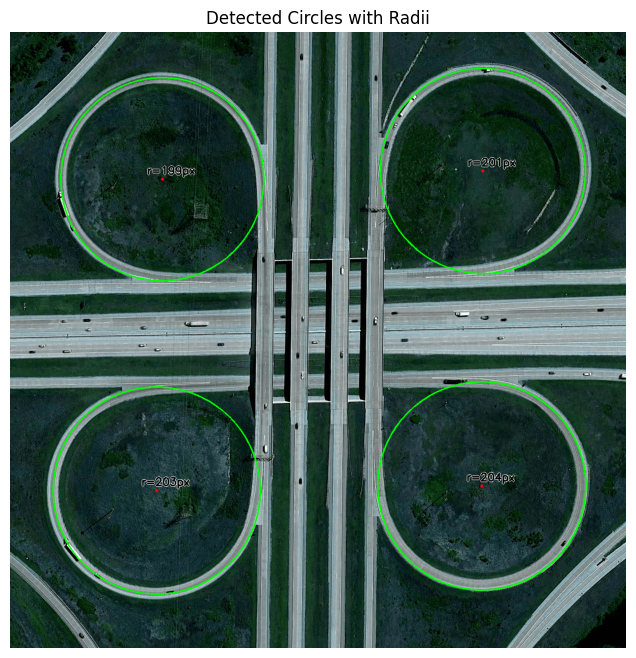

In [12]:
radii_list, annotated_image = calculate_radii(cloverleaf, load_cloverleaf_image('cloverleaf_interchange.png'))

**Advantages of Preprocessing**:

Grayscale conversion simplified the image, making processing faster. Bilateral filtering smoothed noise without blurring important edges. Thresholding clearly separated the bridge from the background. Morphological operations cleaned up the image, improving edge detection.

**Challenges Faced**:

The Hough Circle Transform wasn't accurate enough for detecting the cloverleaf circles. Two circular roads were present in each leaf, causing errors. The intersecting roads in the middle of the cloverleaf created significant issues in detection. A custom circle fitting algorithm was needed.

**How challenges were addressed**:

A new circle fitting algorithm based on linear algebra was developed for better accuracy. The image was split into quadrants to isolate individual cloverleaf circles and reduce interference between them. A road mask was created to remove the interfering middle intersection roads.

**Potential Algo failures:**

The algorithm might fail if the cloverleaf structures are significantly distorted or occluded. Very noisy images could lead to inaccurate edge detection and failed circle fitting. Low resolution images might not contain enough information for reliable detection. The algorithm may also fail if the number of edge points in a quadrant is very low, such as in the case of severely damaged sections of the cloverleaf.


Assumption:   PERFECT CIRCLE LEAVES

In [24]:
# simple area calculation 
def calculate_area_from_radii(image, radii_list):
    h, w = image.shape[:2]
    results = []
    
    for quadrant, radius in radii_list:
        # Approximation using radius
        area_by_radius = math.pi * (radius ** 2)
        
        # pixel count (within circle)
        mask = np.zeros((h, w), dtype=np.uint8)
        center_x, center_y = w // 4, h // 4
        
        # Adjust the center based on the quadrant
        if quadrant == 'Top-Left':
            center_x, center_y = w // 4, h // 4
        elif quadrant == 'Top-Right':
            center_x, center_y = 3 * w // 4, h // 4
        elif quadrant == 'Bottom-Left':
            center_x, center_y = w // 4, 3 * h // 4
        elif quadrant == 'Bottom-Right':
            center_x, center_y = 3 * w // 4, 3 * h // 4
        
        cv2.circle(mask, (center_x, center_y), radius, 255, -1)        
        area_by_pixels = cv2.countNonZero(mask)
        
        results.append({
            "quadrant": quadrant,
            "radius": radius,
            "area_by_radius": area_by_radius,
            "area_by_pixels": area_by_pixels
        })
    
    return results


In [26]:
areas = calculate_area_from_radii(load_cloverleaf_image('./cloverleaf_interchange.png'), radii_list)

for result in areas:
    print(f"{result['quadrant']} Quadrant:")
    print(f"  Radius: {result['radius']} pixels")
    print(f"  Area (using radius): {result['area_by_radius']:.2f} square pixels")
    print(f"  Area (using pixels): {result['area_by_pixels']} square pixels")
    print()


Top-Left Quadrant:
  Radius: 199 pixels
  Area (using radius): 124410.21 square pixels
  Area (using pixels): 124381 square pixels

Top-Right Quadrant:
  Radius: 201 pixels
  Area (using radius): 126923.48 square pixels
  Area (using pixels): 126909 square pixels

Bottom-Left Quadrant:
  Radius: 203 pixels
  Area (using radius): 129461.89 square pixels
  Area (using pixels): 129393 square pixels

Bottom-Right Quadrant:
  Radius: 204 pixels
  Area (using radius): 130740.52 square pixels
  Area (using pixels): 130721 square pixels

